# Uploading datasets

In [ ]:
import db_functions as f
import importlib
importlib.reload(f)

con = f.Connection()

con.upload('upload_lfw.csv', 'lfw', 'Test_description_1')
con.upload('upload_yt_face.csv', 'yt', 'Test_description_2')

# Testing model

In [10]:
import face_recognition
import db_functions as f
import importlib
importlib.reload(f)
import numpy as np

In [11]:
class Model():
    def __init__(self, name) -> None:
        self.t = 0.7
        self.name = name

    def given_learn(self, img_list):
        self.encodings = []
        for i in img_list:
            if len(face_recognition.face_encodings(np.array(i, dtype=np.uint8))) > 0:
                self.encodings.append(face_recognition.face_encodings(np.array(i, dtype=np.uint8))[0])
            else:
                self.encodings.append(np.zeros(128))
        return self.encodings
    
    def recognize(self, img):
        ret_vect = np.zeros(len(self.encodings))
        face = face_recognition.face_encodings(np.array(img, dtype=np.uint8))
        if len(face) < 1:
            return None
        else:
            dist = face_recognition.face_distance(self.encodings, face_recognition.face_encodings(np.array(img, dtype=np.uint8))[0])
        
        if min(dist) < self.t:
            ret_vect[dist.argmin()] = 1
        return ret_vect
    
model = Model("aaa")

d:\AGH\Semestr_9\Praca_magisterska\db_functions.py:153: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  persons = session.query(Person).where(Person.id == Img.person_id).where(Img.ds_id == dataset_id).distinct().order_by(func.random()).all()
d:\AGH\Semestr_9\Praca_magisterska\db_functions.py:194: SAWarning: implicitly coercing SELECT object to scalar subquery; please use the .scalar_subquery() method to produce a scalar subquery.
  persons = session.query(Person).where((Person.id == Img.person_id) & (Person.id.notin_(known_id))).where(Img.ds_id == dataset_id).distinct().order_by(func.random()).all()


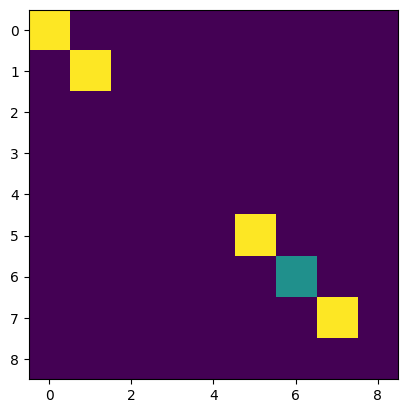

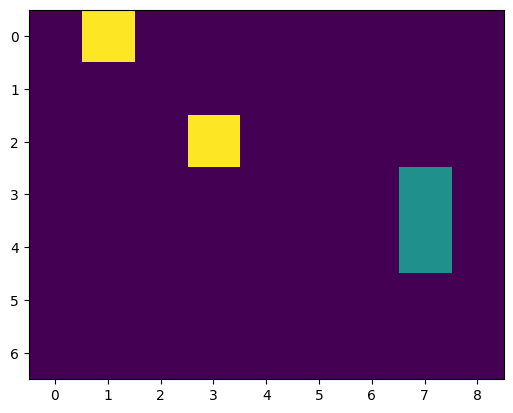

Name of tested model:     Test_model_2
Training time:            8.347445700000208
Average recognition time: 0.4967736687500235
Size of model:            10928

FNMR:  0.5
FMR:   0.42857142857142855
FTA:   16
FRR:   0.75
FAR:   0.21428571428571427


In [13]:
importlib.reload(f)
nm = "Test_model_2"
con = f.Connection()
con.prepare('lfw', 9, 2, 7, 2)
model = Model(nm)
con.train_model(model)
con.add_model(model)
con.verify_model(model_name=nm, visual=True)